# Bank Marketing Classification

In this part of the assignment we want to do a classification task using PyTorch on bank marketing dataset.

#Import Library

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
from google.colab import drive

#Load Dataset
Here, you should download and load the dataset. After that, you should split train dataset to train and validation sets. Finally, define the dataloaders for `train`, `validation` and `test`

In [27]:
# Mount Google Drive
drive.mount('/content/gdrive/', force_remount=True)

%cp /content/gdrive/MyDrive/ML/HW4/q1/bank-full.csv /content/
data = pd.read_csv('bank-full.csv', sep=';')
data.columns = data.columns.str.replace('"', '')

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

X = data.drop(columns=['y'])
y = data['y']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Mounted at /content/gdrive/


#Normalize data
normalize numerical data.

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Create Data Loader
create data loader for pytorch

In [29]:
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train.values, dtype=torch.float32))
val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val.values, dtype=torch.float32))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test.values, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

#Model
define your model in here

In [30]:
class BankMarketingNet(nn.Module):
    def __init__(self):
        super(BankMarketingNet, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

#Train your model
Define `criterion` and `optimizer`.
Train your model

Tasks:
- [ ] Things that are needed to be printed in each epoch:
  - Number of epoch
  - Train loss
  - Validation loss
- [ ] save train/validation loss (of each epoch) in an array for later usage

In [31]:
model = BankMarketingNet()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    print("Epoch", epoch + 1, "/", num_epochs, ", Train Loss:", train_loss, ", Validation Loss:", val_loss)

Epoch 1 / 20 , Train Loss: 0.2715344798030718 , Validation Loss: 0.24096749172034398
Epoch 2 / 20 , Train Loss: 0.23702629539623576 , Validation Loss: 0.23505315672553762
Epoch 3 / 20 , Train Loss: 0.23107028638346577 , Validation Loss: 0.23332444300324146
Epoch 4 / 20 , Train Loss: 0.2274791723784973 , Validation Loss: 0.22966249192684468
Epoch 5 / 20 , Train Loss: 0.22442444378756127 , Validation Loss: 0.2316083700828989
Epoch 6 / 20 , Train Loss: 0.22300569402089096 , Validation Loss: 0.23237269786252102
Epoch 7 / 20 , Train Loss: 0.22114254848785558 , Validation Loss: 0.23218923324430493
Epoch 8 / 20 , Train Loss: 0.21931826015758626 , Validation Loss: 0.22651209367412917
Epoch 9 / 20 , Train Loss: 0.2161522750514296 , Validation Loss: 0.23087933879922812
Epoch 10 / 20 , Train Loss: 0.2146652507999877 , Validation Loss: 0.23303067154237922
Epoch 11 / 20 , Train Loss: 0.21310446982465261 , Validation Loss: 0.22734503002024034
Epoch 12 / 20 , Train Loss: 0.21069115930113871 , Validat

### Visualize Loss plot

Using the arrays that you have (from previous task in the above section), visualize Loss plot (train and validation together)

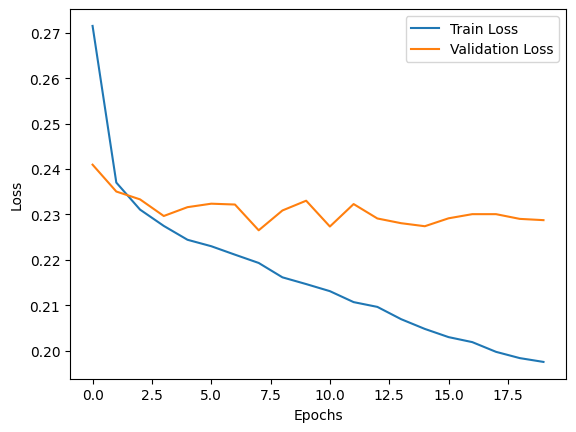

In [32]:
plt.plot(range(num_epochs), train_losses, label='Train Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluation

Test your trained model (using the Test Dataloader that you have).

In [33]:
model.eval()
test_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        test_loss += loss.item()
        predicted = (outputs.squeeze() > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss /= len(test_loader)
accuracy = correct / total

print("Test Accuracy: ", accuracy)

Test Accuracy:  0.9005860886873825
